In [5]:
from dwave.system import DWaveSampler, EmbeddingComposite
from dimod import BinaryQuadraticModel
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [6]:
#constructing our objective function
Nlim = 3# number of wind farms to be assigned - increase the Nlim for more number of locations

def create_random_matrix(n):
    return np.random.randint(1, 51, size=(n, n))
    
C = create_random_matrix(Nlim)  #cost of transporting one unit of energy from location i to location j
T = create_random_matrix(Nlim)  #number of units of energy to be transported from p to plant q

In [7]:
bqm = BinaryQuadraticModel('BINARY')  #Creating a BQM model

In [8]:
x = [[BinaryQuadraticModel('BINARY') for j in range(Nlim)] for i in range(Nlim)]

In [9]:
#Koopmans-Beckmann formulations
for q in range(Nlim):
    for p in range(Nlim):
        for i in range(Nlim):
            for j in range(Nlim):
                if (i != p) or (j != q):
                    bqm.add_interaction(f"x_{i}_{j}", f"x_{p}_{q}", C[i][j] * T[p][q]) 

In [10]:
c1 = [(f"x_{p}_{i}", 1) for i in range(Nlim)]  #constraint ensures only one the binary variable is 1
bqm.add_linear_equality_constraint(c1, constant=0, lagrange_multiplier = 10)

In [11]:
c2 = [(f"x_{p}_{i}", 1) for p in range(Nlim)] #constraint ensures only one the binary variable is 1
bqm.add_linear_equality_constraint(c2, constant=0, lagrange_multiplier = 20)

In [12]:
qubo = BinaryQuadraticModel.to_qubo(bqm)
qubo_matrix = qubo[0]

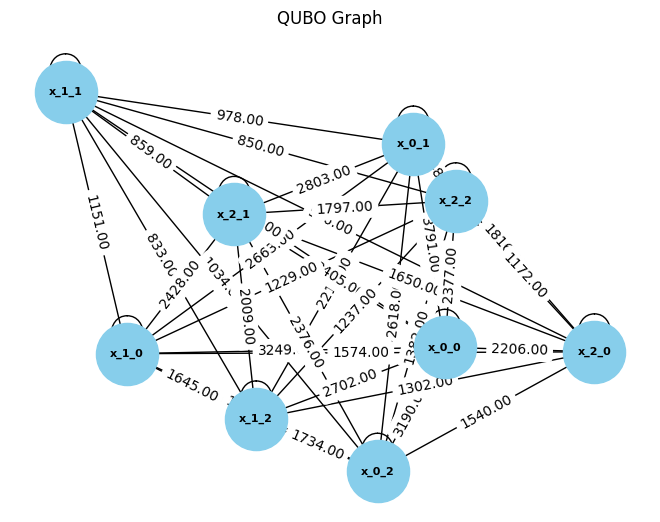

In [13]:
G = nx.Graph()

for edge, weight in qubo_matrix.items():
    node1, node2 = edge
    G.add_edge(node1, node2, weight=weight)

pos = nx.spring_layout(G)
edge_labels = {(node1, node2): f'{weight:.2f}' for (node1, node2), weight in qubo_matrix.items()}
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color='skyblue', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("QUBO Graph")
plt.show()

In [24]:
sampler = EmbeddingComposite(DWaveSampler(token='DEV-9e6ad578adxxxxxxxxxxxxxxxxxxxxxxxxxxx'))
sampleset = sampler.sample_qubo(qubo_matrix, num_reads=1000)

In [33]:
min_energy = float('inf')
min_sample = None

for sample, energy in zip(sampleset.samples(), sampleset.record['energy']):
    print(f"Sample: {sample}, Energy: {energy}")

    if energy < min_energy:
        min_energy = energy
        min_sample = sample

print(f"\nMinimum Energy Solution: {min_sample}, Energy: {min_energy}")

Sample: {'x_0_0': 0, 'x_0_1': 0, 'x_0_2': 0, 'x_1_0': 1, 'x_1_1': 0, 'x_1_2': 0, 'x_2_0': 0, 'x_2_1': 0, 'x_2_2': 0}, Energy: 0.0
Sample: {'x_0_0': 0, 'x_0_1': 1, 'x_0_2': 0, 'x_1_0': 0, 'x_1_1': 0, 'x_1_2': 0, 'x_2_0': 0, 'x_2_1': 0, 'x_2_2': 0}, Energy: 0.0
Sample: {'x_0_0': 1, 'x_0_1': 0, 'x_0_2': 0, 'x_1_0': 0, 'x_1_1': 0, 'x_1_2': 0, 'x_2_0': 0, 'x_2_1': 0, 'x_2_2': 0}, Energy: 0.0
Sample: {'x_0_0': 0, 'x_0_1': 0, 'x_0_2': 0, 'x_1_0': 0, 'x_1_1': 1, 'x_1_2': 0, 'x_2_0': 0, 'x_2_1': 0, 'x_2_2': 0}, Energy: 0.0
Sample: {'x_0_0': 0, 'x_0_1': 0, 'x_0_2': 0, 'x_1_0': 0, 'x_1_1': 0, 'x_1_2': 0, 'x_2_0': 0, 'x_2_1': 0, 'x_2_2': 0}, Energy: 0.0
Sample: {'x_0_0': 0, 'x_0_1': 0, 'x_0_2': 0, 'x_1_0': 0, 'x_1_1': 0, 'x_1_2': 0, 'x_2_0': 1, 'x_2_1': 0, 'x_2_2': 0}, Energy: 10.0
Sample: {'x_0_0': 0, 'x_0_1': 0, 'x_0_2': 0, 'x_1_0': 0, 'x_1_1': 0, 'x_1_2': 0, 'x_2_0': 0, 'x_2_1': 1, 'x_2_2': 0}, Energy: 10.0
Sample: {'x_0_0': 0, 'x_0_1': 0, 'x_0_2': 0, 'x_1_0': 0, 'x_1_1': 0, 'x_1_2': 1, 'x_2_0'

In [28]:
sampler = EmbeddingComposite(DWaveSampler(token='DEV-9e6ad578adxxxxxxxxxxxxxxxxxxxxxxxxxx'))
sampleset = sampler.sample(bqm, num_reads=1000) #lets solve bqm directly

In [29]:
for sample in sampleset.samples():
    print(sample)
    break 

{'x_0_0': 0, 'x_0_1': 0, 'x_0_2': 0, 'x_1_0': 1, 'x_1_1': 0, 'x_1_2': 0, 'x_2_0': 0, 'x_2_1': 0, 'x_2_2': 0}
